In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 8
fig_height = 6
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcc2doeXNcTXkgRHJpdmUgKHNnaHlzZWxpQHN0dWRlbnQudWJjLmNhKVxxdWFydG9cZ2l0aHViaW9cY29udGVudFxlb3NjNTU1XGxlY3R1cmVzXGxlY3R1cmUy'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

C:\Users\sghys\AppData\Local\Temp\ipykernel_31492\3486709012.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\importlib\\_bootstrap_external.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\zipimport.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\codecs.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\aliases.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\__init__.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\utf_8.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\encodings\\cp1252.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\io.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\stat.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\_collections_abc.py": 1712046304.0, "C:\\Users\\sghys\\miniconda3\\envs\\ml\\Lib\\

In [2]:
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
import numpy as np
import torch.optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import copy

import seaborn as sns

import math
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch.fft

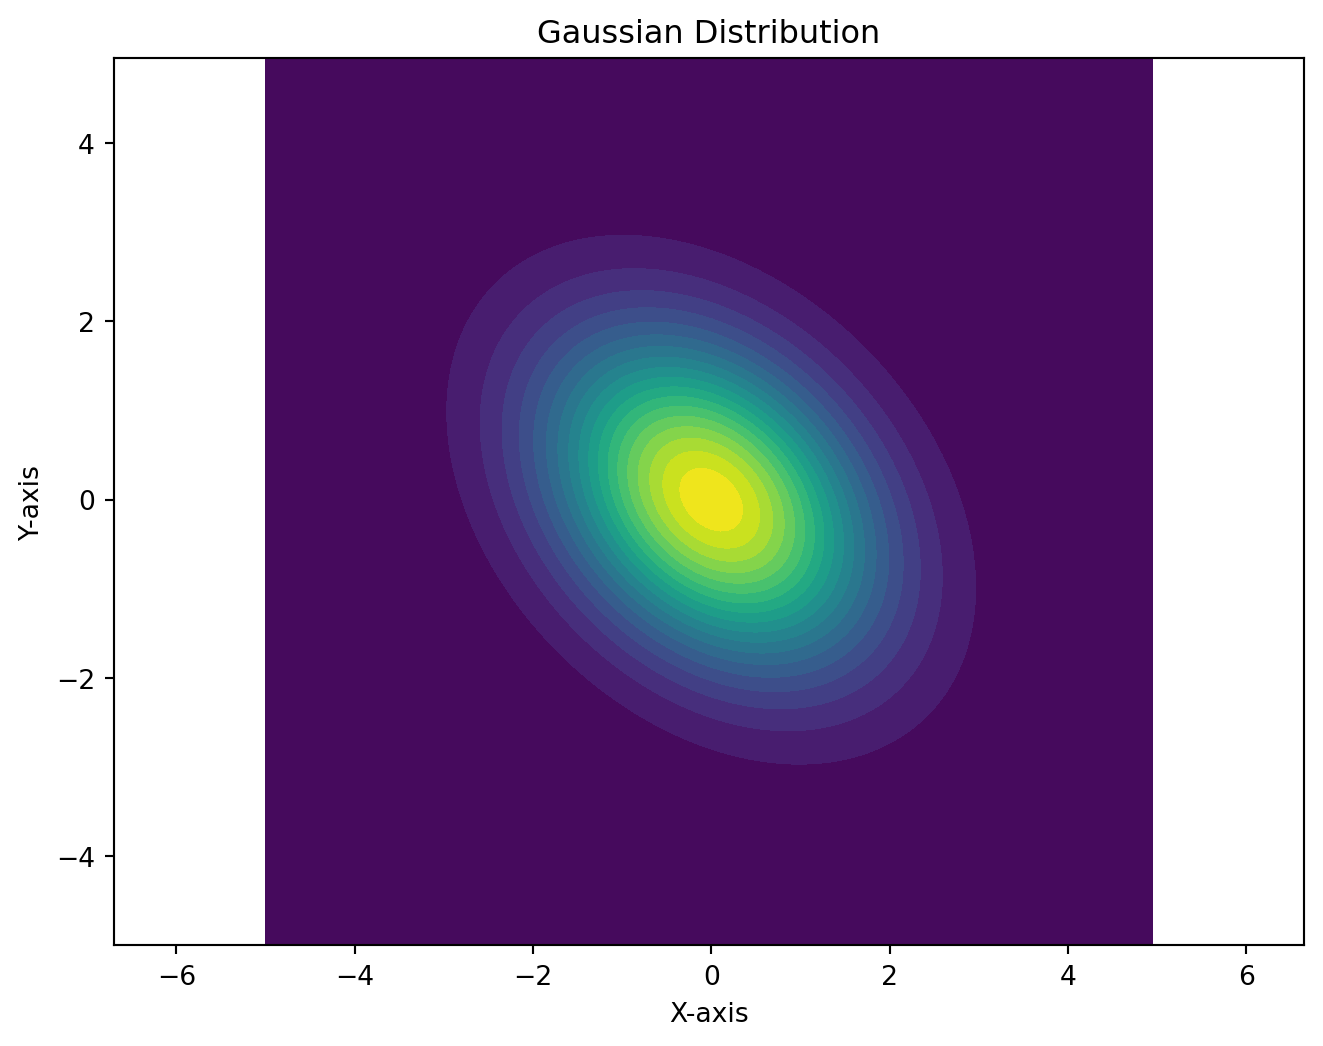

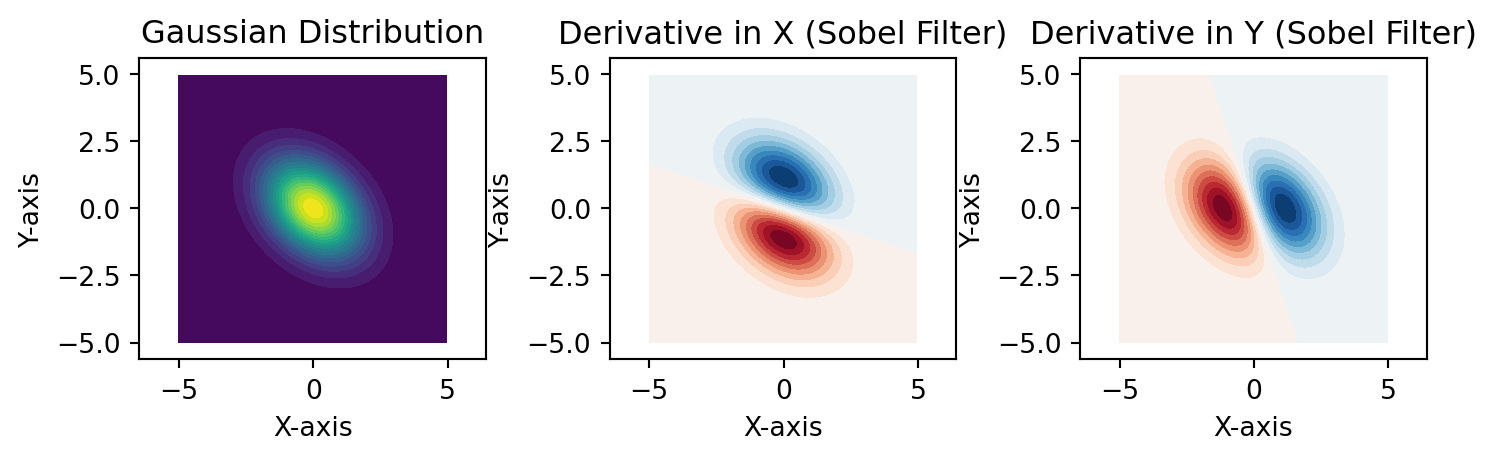

In [3]:
#| label: mv-plot
#| fig-cap: Multivariate Gaussian and its Derivatives
from scipy.ndimage import convolve

def multivariate_gaussian(pos, mean, cov):
    """Return the multivariate Gaussian distribution on array pos without using einsum notation."""
    n = mean.shape[0]
    diff = pos - mean
    cov_inv = np.linalg.inv(cov)
    
    # Compute the exponent
    diff_cov_inv = diff @ cov_inv
    exponent = -0.5 * np.sum(diff * diff_cov_inv, axis=-1)
    
    # Compute the normalization factor
    norm_factor = np.sqrt((2 * np.pi) ** n * np.linalg.det(cov))
    
    # Return the Gaussian function
    return np.exp(exponent) / norm_factor

# Define the grid limits and resolution
X, Y = np.mgrid[-5:5:0.05, -5:5:0.05]
pos = np.dstack((X, Y))

# Parameters
mean = np.array([0, 0])
eigenvalues = np.array([1, 2])  # Example eigenvalues
principal_axis = np.array([1, 1])  # Example principal axis

# Normalize the principal axis
principal_axis = principal_axis / np.linalg.norm(principal_axis)

# Create the covariance matrix
D = np.diag(eigenvalues)
orthogonal_complement = np.array([-principal_axis[1], principal_axis[0]])
Q = np.column_stack((principal_axis, orthogonal_complement))
cov = Q @ D @ Q.T

# Compute the Gaussian function over the grid
Z = multivariate_gaussian(pos, mean, cov)

# Define the Sobel operators for x and y derivatives
Kdx = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]]) / 4.0

Kdy = np.array([[-1, -2, -1],
                [0,  0,  0],
                [1,  2,  1]]) / 4.0

# Apply the Sobel filters to compute the derivatives
Zdx = convolve(Z, Kdx, mode='constant', cval=0.0)
Zdy = convolve(Z, Kdy, mode='constant', cval=0.0)


plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.title('Gaussian Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.savefig('figure.png', dpi=300, bbox_inches='tight')

# Plot the Gaussian and its derivatives
plt.figure(figsize=(7.5, 2.5))

# Plot the Gaussian
plt.subplot(1, 3, 1)
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.title('Gaussian Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')

# Plot the derivative in x
plt.subplot(1, 3, 2)
plt.contourf(X, Y, Zdx, levels=20, cmap='RdBu')
plt.title('Derivative in X (Sobel Filter)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')

# Plot the derivative in y
plt.subplot(1, 3, 3)
plt.contourf(X, Y, Zdy, levels=20, cmap='RdBu')
plt.title('Derivative in Y (Sobel Filter)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')

plt.tight_layout()
plt.show()

In [4]:
#| fig-cap: "Torch Module for Gaussian Convolution"
class gaussianConv(nn.Module):
    """
    A PyTorch module that applies a Gaussian convolution to an input image using 
    a parameterized Gaussian Point Spread Function (PSF). The PSF is derived 
    from a covariance matrix and the derivatives of the Gaussian are computed 
    for edge detection.

    Args:
        C (torch.Tensor): Inverse of covariance matrix used to define the shape of the Gaussian.
        t (float, optional): Scaling factor for the Gaussian, default is np.exp(5).
        n0 (float, optional): Scaling factor for the original PSF, default is 1.
        nx (float, optional): Scaling factor for the derivative along the x-axis, default is 1.
        ny (float, optional): Scaling factor for the derivative along the y-axis, default is 1.
    """
    def __init__(self, C, t=np.exp(5), n0=1, nx=1, ny=1):
        super(gaussianConv, self).__init__()

        self.C = C
        self.t = t
        self.n0 = n0
        self.nx = nx
        self.ny = ny

    def forward(self, image):
        """
        Apply the Gaussian convolution and derivatives to an input image.

        This method performs convolution of the input image with a Gaussian
        Point Spread Function (PSF) that includes the original Gaussian and
        its derivatives along x and y axes. The convolution is performed
        using the Fourier Transform for efficiency.

        Args:
            image (torch.Tensor): Input image tensor of shape (Batch, Channels, Height, Width).
        
        Returns:
            torch.Tensor: The convolved image of the same shape as the input.
        """

        # Generate the PSF and calculate the center shift required for alignment
        P, center = self.psfGauss(image.shape[-1], image.device)

        # Shift the PSF so that its center aligns with the origin (top-left corner)
        P_shifted = torch.roll(P, shifts=center, dims=[2, 3])

        # Compute the Fourier Transform of the shifted PSF
        S = torch.fft.fft2(P_shifted)

        # Compute the Fourier Transform of the input image
        I_fft = torch.fft.fft2(image)

        # Multiply the Fourier Transforms element-wise (convolution theorem with Hadamard product)
        B_fft = S * I_fft

        # Compute the inverse Fourier Transform to get back to the spatial domain
        B = torch.real(torch.fft.ifft2(B_fft))

        # Return the convolved image
        return B

    def psfGauss(self, dim, device='cpu'):
        """
        Generate the Gaussian PSF and its derivatives.

        Args:
            dim (int): Dimension size (assumes square dimensions).
            device (str, optional): Device to create tensors on, default is 'cpu'.

        Returns:
            tuple:
                - PSF (torch.Tensor): The combined PSF including derivatives.
                - center (list): Shifts required to align the PSF with the origin.
        """
        # Define the size of the PSF kernel (assumed to be square)
        m = dim
        n = dim

        # Create a meshgrid of (X, Y) coordinates
        x = torch.arange(-m // 2 + 1, m // 2 + 1, device=device)
        y = torch.arange(-n // 2 + 1, n // 2 + 1, device=device)
        X, Y = torch.meshgrid(x, y, indexing='ij')
        X = X.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, m, n)
        Y = Y.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, m, n)

        # Extract elements from the covariance matrix
        # Assuming self.C is a 2x2 tensor
        cx, cy, cxy = self.C[0, 0], self.C[1, 1], self.C[0, 1]

        # Compute the Gaussian PSF using the meshgrid and covariance elements
        PSF = torch.exp(-self.t * (cx * X ** 2 + cy * Y ** 2 + 2 * cxy * X * Y))

        # Normalize the PSF so that its absolute sum is 1
        PSF0 = PSF / torch.sum(PSF.abs())

        # Define derivative kernels (Sobel operators) for edge detection
        Kdx = torch.tensor([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]], dtype=PSF0.dtype, device=device) / 4
        Kdy = torch.tensor([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]], dtype=PSF0.dtype, device=device) / 4

        # Reshape kernels to match convolution requirements
        Kdx = Kdx.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 3, 3)
        Kdy = Kdy.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, 3, 3)

        # Convolve the PSF with the derivative kernels to obtain derivatives
        # Padding ensures the output size matches the input size
        PSFdx = F.conv2d(PSF0, Kdx, padding=1)
        PSFdy = F.conv2d(PSF0, Kdy, padding=1)

        # Combine the original PSF and its derivatives using the scaling factors
        PSF_combined = self.n0 * PSF0 + self.nx * PSFdx + self.ny * PSFdy

        # Calculate the center shift required to align the PSF with the origin
        center = [1 - m // 2, 1 - n // 2]

        # Return the combined PSF and center shift
        return PSF_combined, center

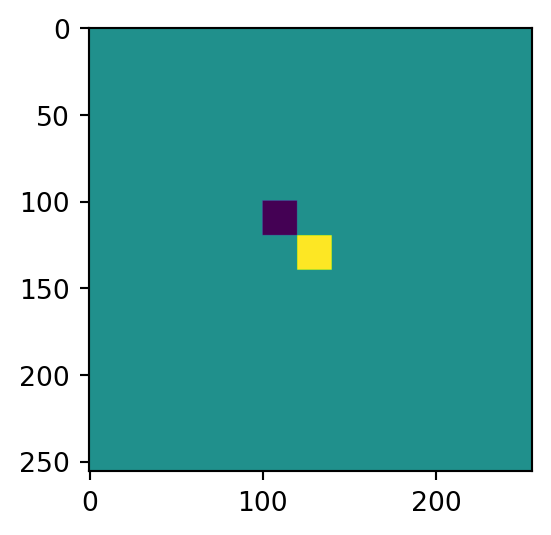

In [5]:
#| label: toy-dataset
#| fig-cap: A sample toy dataset for image denoising and deblurring.
x = torch.zeros(1, 1, 256, 256)
x[:,:, 120:140, 120:140] = 1.0
x[:,:, 100:120, 100:120] = -1.0

plt.figure(figsize=(3,3))
plt.imshow(x[0,0,:,:])

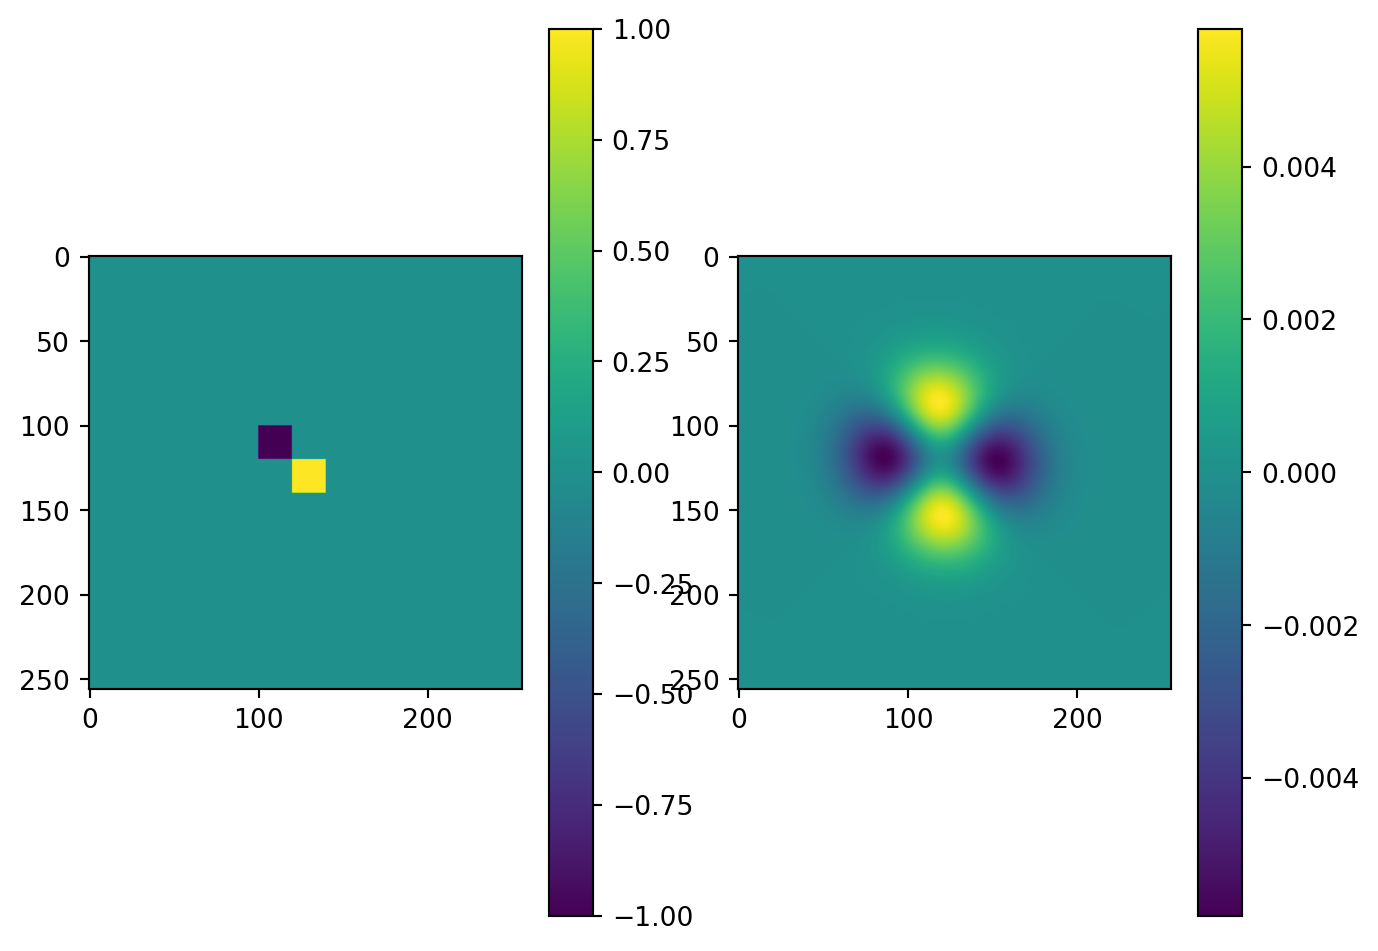

In [6]:
#| label: forward-model
#| fig-cap: Forward model for image denoising and deblurring.

C = torch.tensor([[1, 0],[0, 1]])
Amv = gaussianConv(C, t=0.001,n0=0, nx=1,  ny=-1)

y = Amv(x)
plt.subplot(1,2,1)
plt.imshow(x[0,0,:,:])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(y[0,0,:,:])
plt.colorbar()
print()

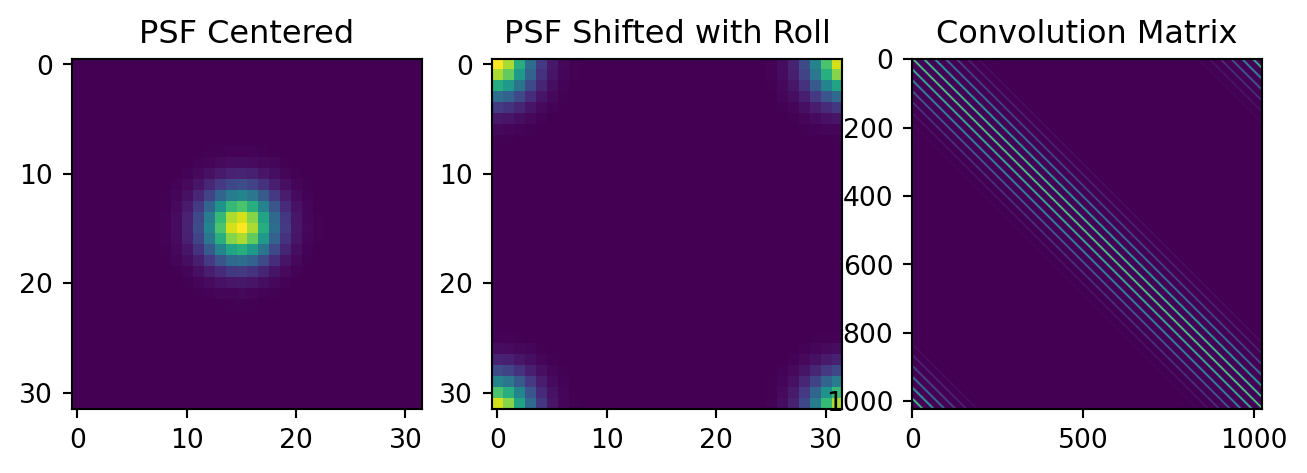

In [7]:
#| label: convolution-matrix
#| fig-cap: Forming a convolution matrix for the forward model.

dim = 32
x = torch.zeros(1, 1, dim, dim)
x[:,:, 12:14, 12:14] = 1.0
x[:,:, 10:12, 10:12] = -1.0

Amv = gaussianConv(C, t=0.1,n0=1, nx=0.1,  ny=0.1)

# Flatten the image and the PSF
x_flat = x.flatten()

kernel, center = Amv.psfGauss(x.shape[-1]) # Get a square conv kernel 

# Since we are using the conv kernel as a filter operation, we use the transpose of the kernel
# to fill the convolution matrix. 

kernel = kernel.transpose(2,3) 
# Roll shifts the kernel from the center of the box to the top left corner
kernel_shifted = torch.roll(kernel, shifts=center, dims=[2, 3])

plt.subplot(1,3,1)
plt.imshow(kernel[0,0,:,:])
plt.title('PSF Centered')
plt.subplot(1,3,2)
plt.title('PSF Shifted with Roll')
plt.imshow(kernel_shifted[0,0,:,:])

# Flatten the kernel
kernel_flat = kernel_shifted.flatten()

# Form the convolution matrix
n = x_flat.shape[0]
m = kernel_flat.shape[0]
A_conv = torch.zeros(n, n)

for i in range(n):
    A_conv[i, :] = torch.roll(kernel_flat, shifts=i, dims=[0])

plt.subplot(1,3,3)
plt.imshow(A_conv)
plt.title('Convolution Matrix');

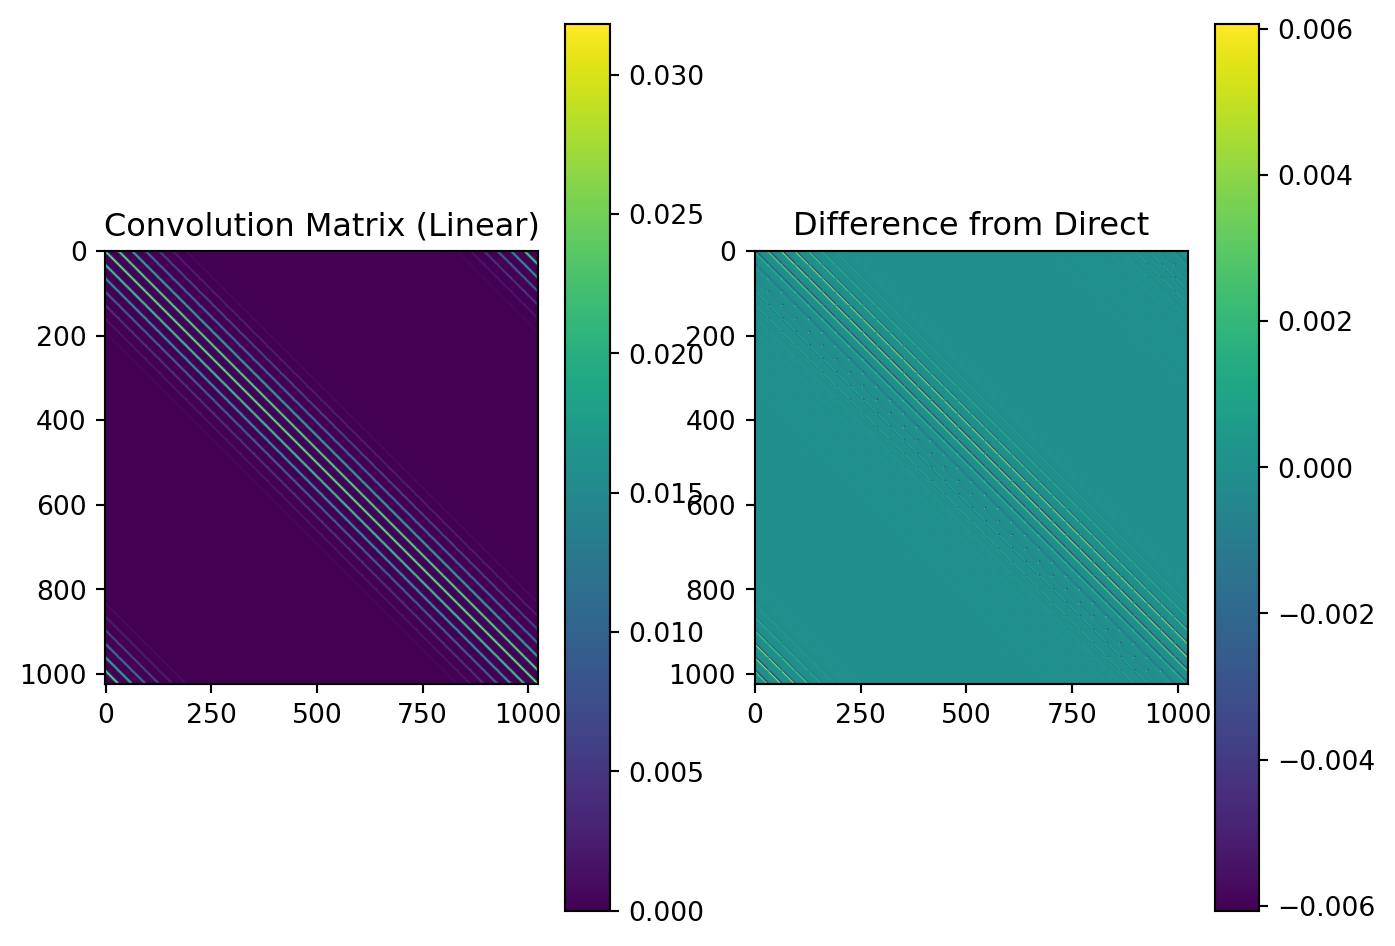

In [8]:
#| label: convolution-matrix-2
#| fig-cap: Forming a convolution matrix for the forward model using linearity.

A_conv_lin = torch.zeros(n, n)

k=0
for i in range(x.shape[-2]):
  for j in range(x.shape[-1]):
    e_ij = torch.zeros_like(x)
    e_ij[:,:, i, j] = 1.0
    y = Amv(e_ij)
    A_conv_lin[:, k] = y.flatten()
    k = k+1

plt.subplot(1,2,1)
plt.imshow(A_conv_lin)
plt.title('Convolution Matrix (Linear)')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(A_conv-A_conv_lin)
plt.title('Difference from Direct')
plt.colorbar()

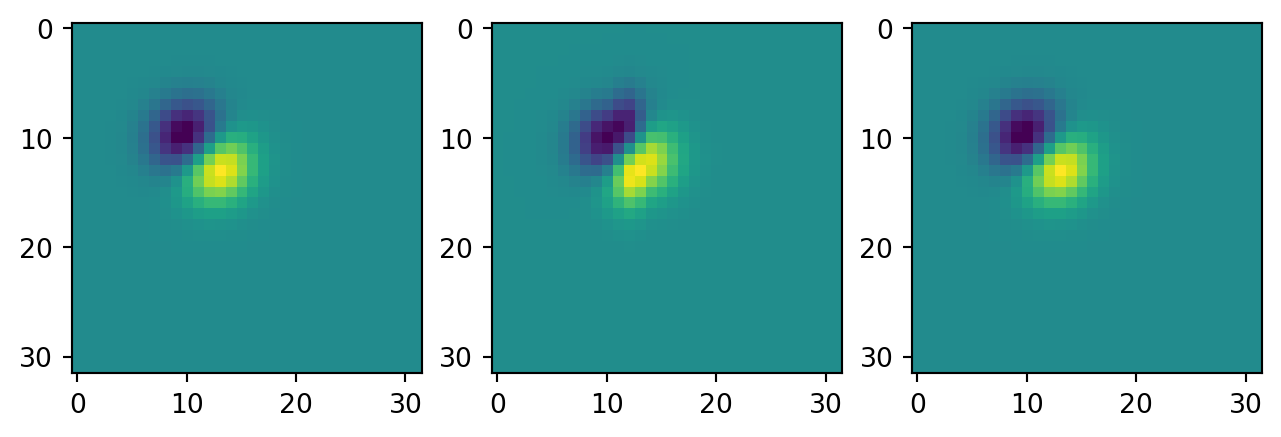

In [9]:
b_forward = Amv(x)

b_mat_toeplitz = A_conv @ x_flat
b_mat_linear = A_conv_lin @ x_flat

plt.subplot(1,3,1)
plt.imshow(b_forward[0,0,:,:])
plt.subplot(1,3,2)
plt.imshow(b_mat_toeplitz.reshape(x.shape[-2:]))
plt.subplot(1,3,3) 
plt.imshow(b_mat_linear.reshape(x.shape[-2:]))

In [10]:
#| label: final-conv-matrix
#| fig-cap: Final Convolution Matrix for the Forward Model.

Amat = A_conv_lin

In [11]:
U, S, V = torch.svd(Amat.to(torch.float64))
b = Amv(x)

The loss is 1.812403923995022e-34


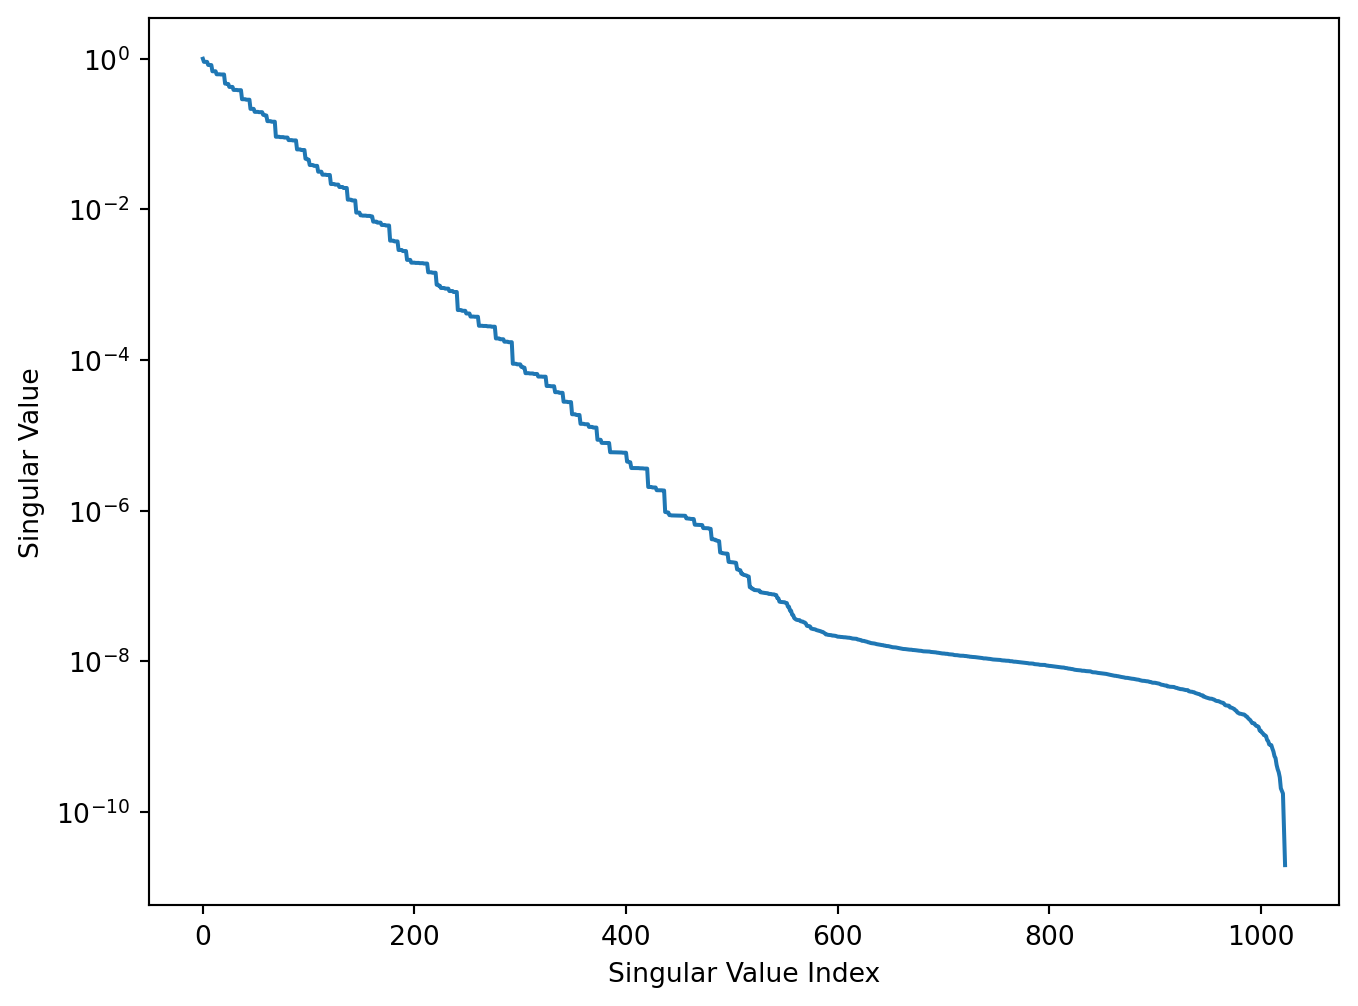

In [12]:
#| label: svd-decomposition
#| fig-cap: SVD Decomposition of the Convolution Matrix.

plt.semilogy(S)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')

loss = F.mse_loss(Amat, U @ torch.diag(S) @ V.T)
print(f"The loss is {loss}")

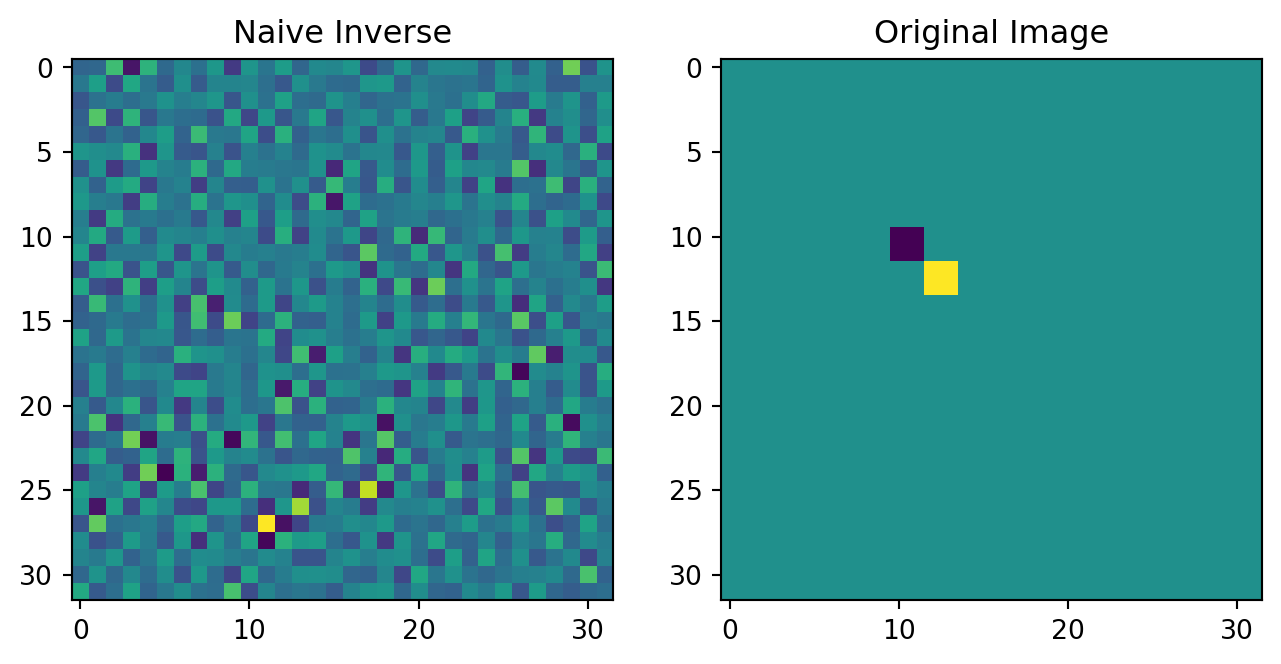

In [13]:
#| label: naive-pseudoinverse
#| fig-cap: Naive Pseudoinverse Recovery of the Original Image.
xhat = torch.linalg.solve(Amat,b.reshape(dim**2))
plt.subplot(1,2,1)
plt.imshow(xhat.reshape(x.shape[-2:]))
plt.title('Naive Inverse')
plt.subplot(1,2,2)
plt.imshow(x.reshape(x.shape[-2:]))
plt.title('Original Image');

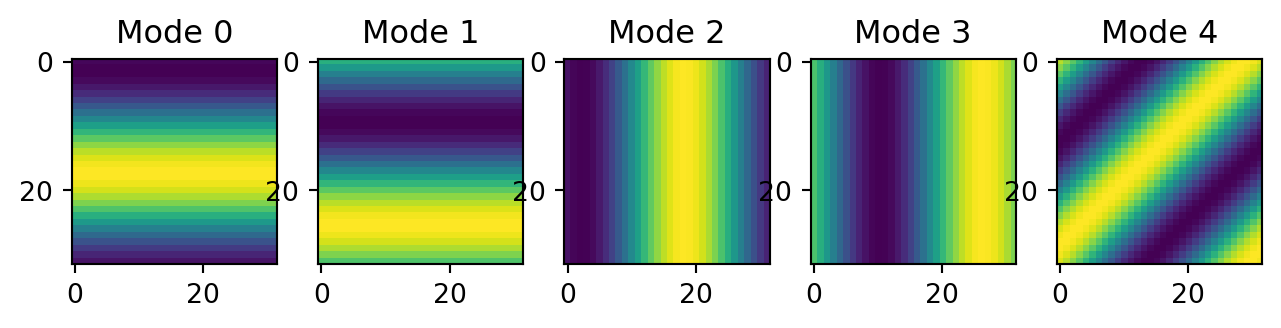

In [14]:
n= 5
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(U[:,i+1].reshape(x.shape[-2:]))
  plt.title(f'Mode {i}')

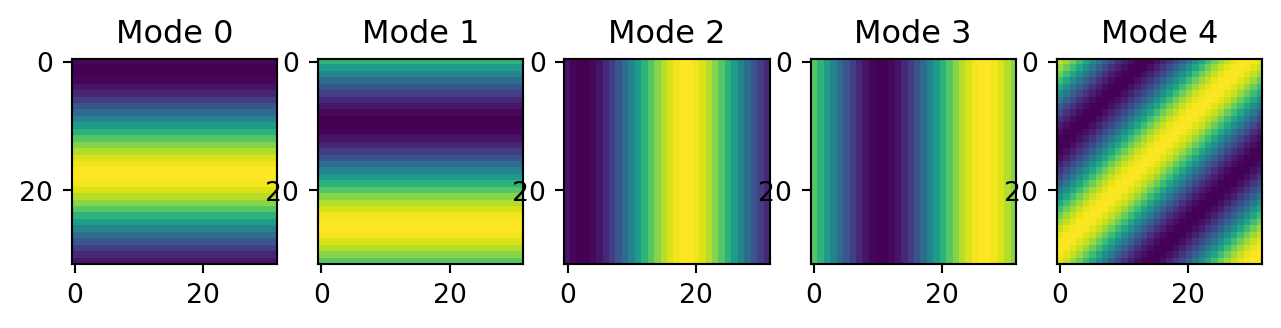

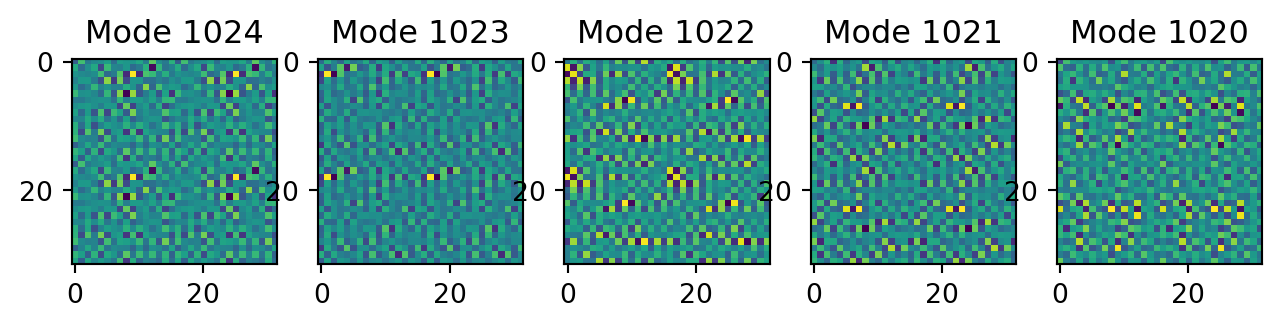

In [15]:
n= 5
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(V[:,i+1].reshape(x.shape[-2:]))
  plt.title(f'Mode {i}')
plt.show()

for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(V[:,-(i+1)].reshape(x.shape[-2:]))
  plt.title(f'Mode {V.shape[1]-i}')
plt.show()

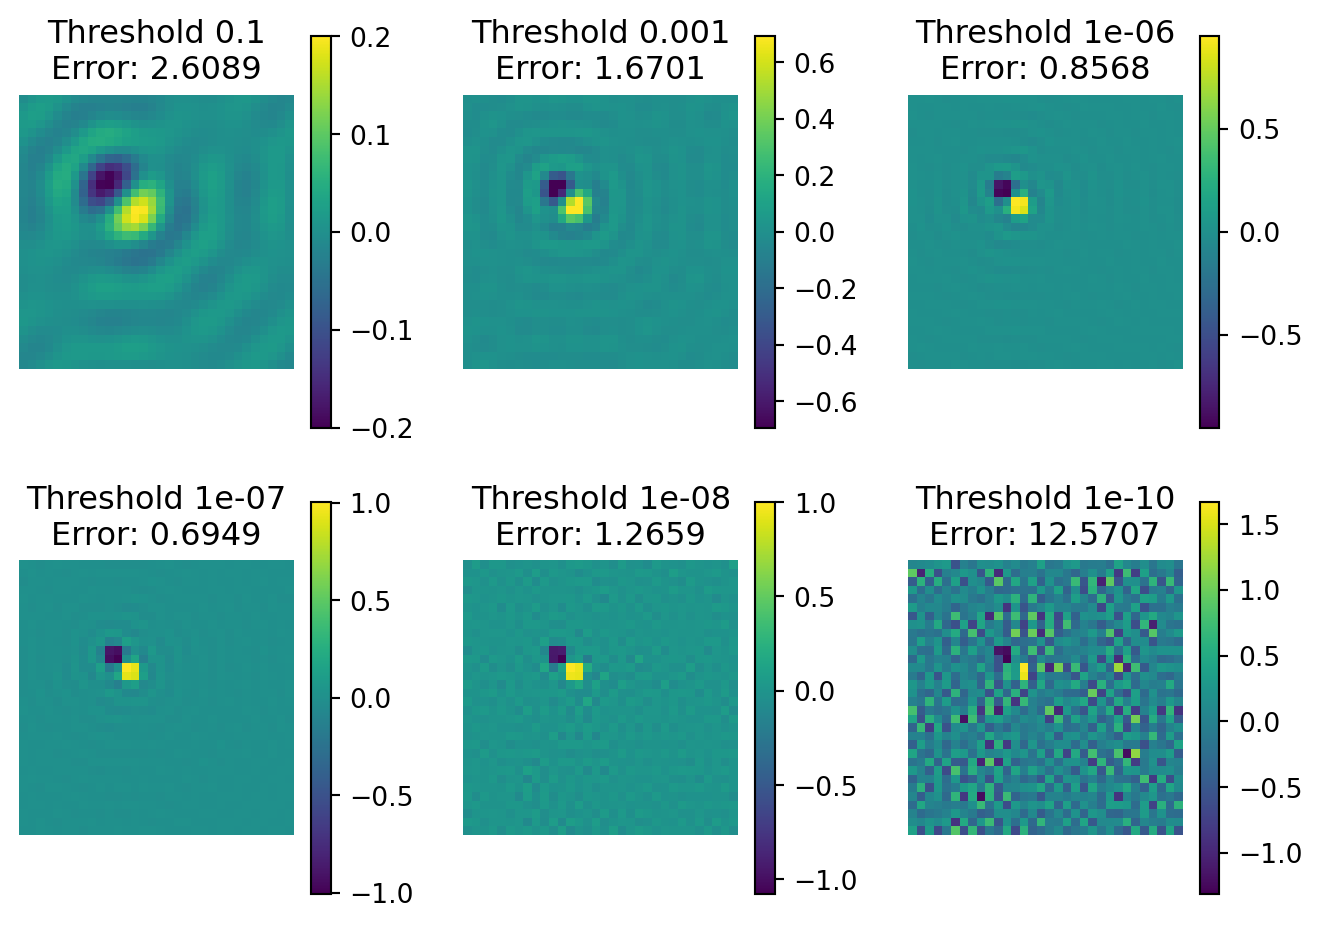

In [16]:
#| label: pseudoinverse-filter
#| fig-cap: Pseudoinverse Recovery of the Original Image with Filtering.

b_flat = b.flatten().to(torch.float64)
x_flat = x.flatten().to(torch.float64)
thresholds = [1e-1, 1e-3, 1e-6, 1e-7, 1e-8, 1e-10]

plt.figure(figsize=(7,5))  # Adjust the figure size as needed

for idx, threshold in enumerate(thresholds):
    # Filter the singular values
    S_filtered = S.clone()
    S_filtered[S_filtered < threshold] = 0

    # Compute the reciprocal of the filtered singular values
    S_inv = torch.zeros_like(S_filtered)
    non_zero_mask = S_filtered > 0
    S_inv[non_zero_mask] = 1 / S_filtered[non_zero_mask]

    # Construct the pseudoinverse of Amat
    A_pinv = V @ torch.diag(S_inv) @ U.T

    # Reconstruct the original image
    xhat = A_pinv @ b_flat

    # Compute the reconstruction error
    error = torch.norm(xhat - x_flat, p='fro').item()

    # Plot the reconstructed image in the appropriate subplot
    plt.subplot(2, 3, idx + 1)  # idx + 1 because subplot indices start at 1
    plt.imshow(xhat.reshape(x.shape[-2:]))
    plt.title(f'Threshold {threshold}\nError: {error:.4f}')
    plt.colorbar()
    plt.axis('off')  # Optionally turn off axis ticks and labels

plt.tight_layout()
plt.show()

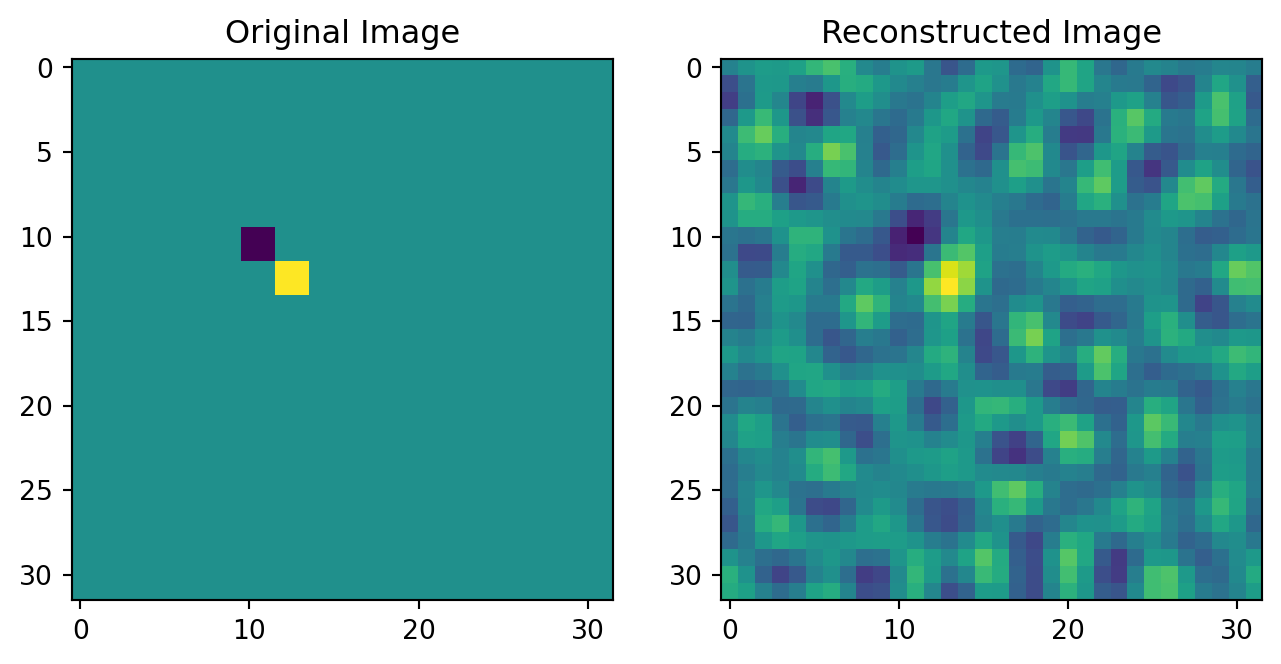

In [17]:
#| label: pseudoinverse-filter-noised
#| fig-cap: Pseudoinverse Recovery of the Original Image with Noise.

b_flat = b.flatten().to(torch.float64)
x_flat = x.flatten().to(torch.float64)
Amat = Amat.to(torch.float64)

alpha = .01
noise = torch.randn_like(b_flat) * alpha

H = Amat.T @ Amat + alpha**2 * torch.eye(Amat.shape[0])
xhat = torch.linalg.solve(H, Amat.T @ (b_flat + noise))

plt.subplot(1,2,1)
plt.imshow(x[0,0])
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(xhat.reshape(x.shape[-2:]))
plt.title('Reconstructed Image');

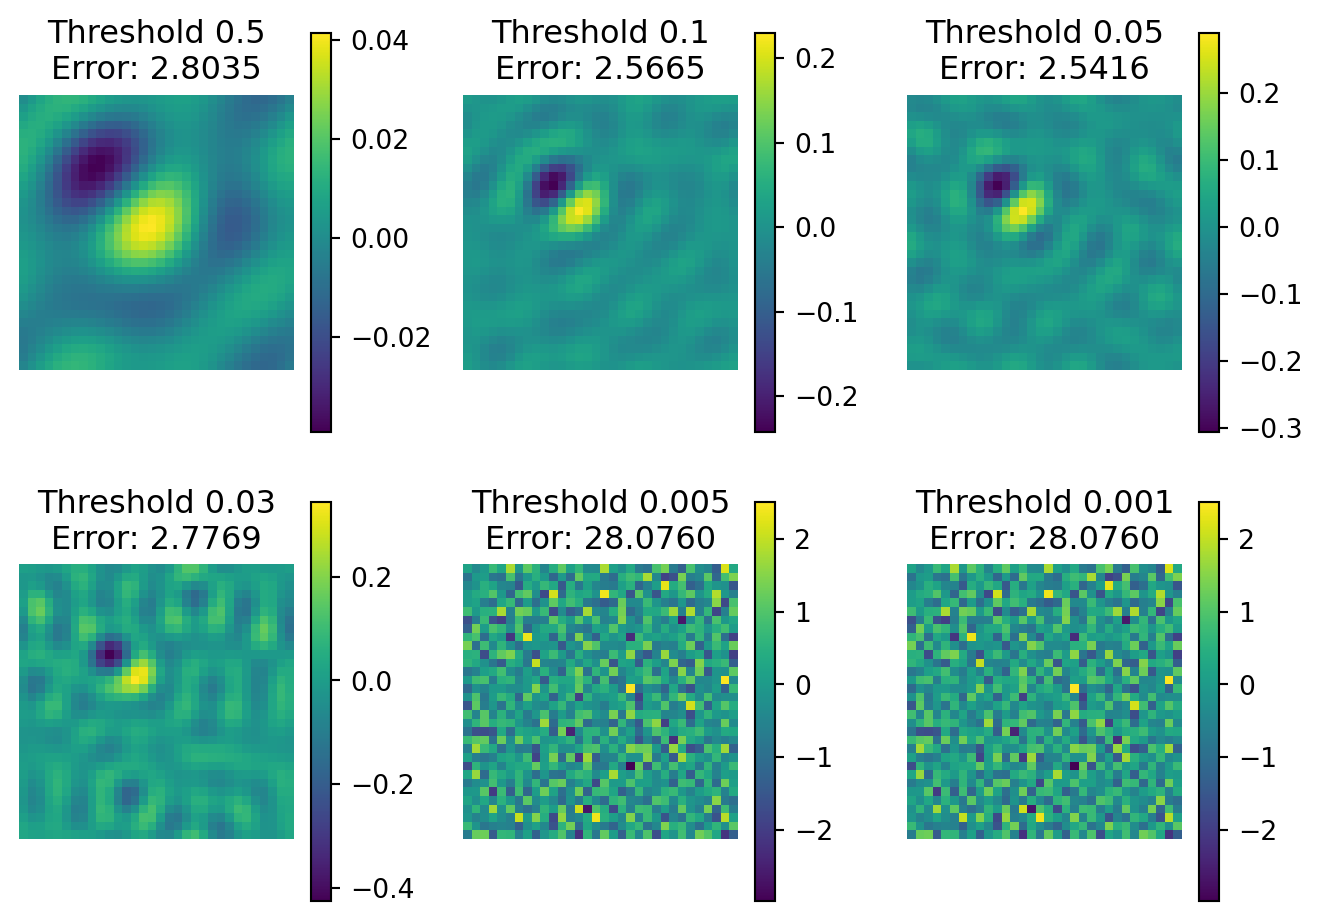

In [18]:
#| label: pseudoinverse-filter-noised-recovery
#| fig-cap: Pseudoinverse Recovery of the Original Image with Noise.

Amat_noisy = Amat + alpha * torch.eye(Amat.shape[0])
Un, Sn, Vn = torch.svd(Amat_noisy)

thresholds = [.5, .1, .05, .03, .005, .001]

plt.figure(figsize=(7,5))  # Adjust the figure size as needed

for idx, threshold in enumerate(thresholds):
    # Filter the singular values
    S_filtered = Sn.clone()
    S_filtered[S_filtered < threshold] = 0

    # Compute the reciprocal of the filtered singular values
    S_inv = torch.zeros_like(S_filtered)
    non_zero_mask = S_filtered > 0
    S_inv[non_zero_mask] = 1 / S_filtered[non_zero_mask]

    # Construct the pseudoinverse of Amat
    A_pinv = Vn @ torch.diag(S_inv) @ Un.T

    # Reconstruct the original image
    xhat = A_pinv @ (b_flat + noise)

    # Compute the reconstruction error
    error = torch.norm(xhat - x_flat, p='fro').item()

    # Plot the reconstructed image in the appropriate subplot
    plt.subplot(2, 3, idx + 1)  # idx + 1 because subplot indices start at 1
    plt.imshow(xhat.reshape(x.shape[-2:]))
    plt.title(f'Threshold {threshold}\nError: {error:.4f}')
    plt.colorbar()
    plt.axis('off')  # Optionally turn off axis ticks and labels

plt.tight_layout()
plt.show()